Fifa World Cup 2018 Goals Analysis

Data Loading and Exploration


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
file_path = '/content/goals.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

      ID    Home          Away        Stage     Scorer ScoringTeam      Type
0  FR001  Russia  Saudi Arabia  GroupRound1   Gazinsky      Russia    Inside
1  FR002  Russia  Saudi Arabia  GroupRound1  Cheryshev      Russia    Inside
2  FR003  Russia  Saudi Arabia  GroupRound1     Dzyuba      Russia    Inside
3  FR004  Russia  Saudi Arabia  GroupRound1  Cheryshev      Russia    Inside
4  FR005  Russia  Saudi Arabia  GroupRound1    Golovin      Russia  Freekick
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           175 non-null    object
 1   Home         175 non-null    object
 2   Away         175 non-null    object
 3   Stage        175 non-null    object
 4   Scorer       175 non-null    object
 5   ScoringTeam  175 non-null    object
 6   Type         175 non-null    object
dtypes: object(7)
memory usage: 9.7+ KB
None
ID             0
Hom

Data Cleaning and Preprocessing

In [ ]:
# Check for and handle any duplicates
data = data.drop_duplicates()

# Handle missing values if any (there shouldn't be in this dataset)
data = data.dropna()

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 174
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           168 non-null    object
 1   Home         168 non-null    object
 2   Away         168 non-null    object
 3   Stage        168 non-null    object
 4   Scorer       168 non-null    object
 5   ScoringTeam  168 non-null    object
 6   Type         168 non-null    object
dtypes: object(7)
memory usage: 10.5+ KB
None


Exploratory Data Analysis (EDA)

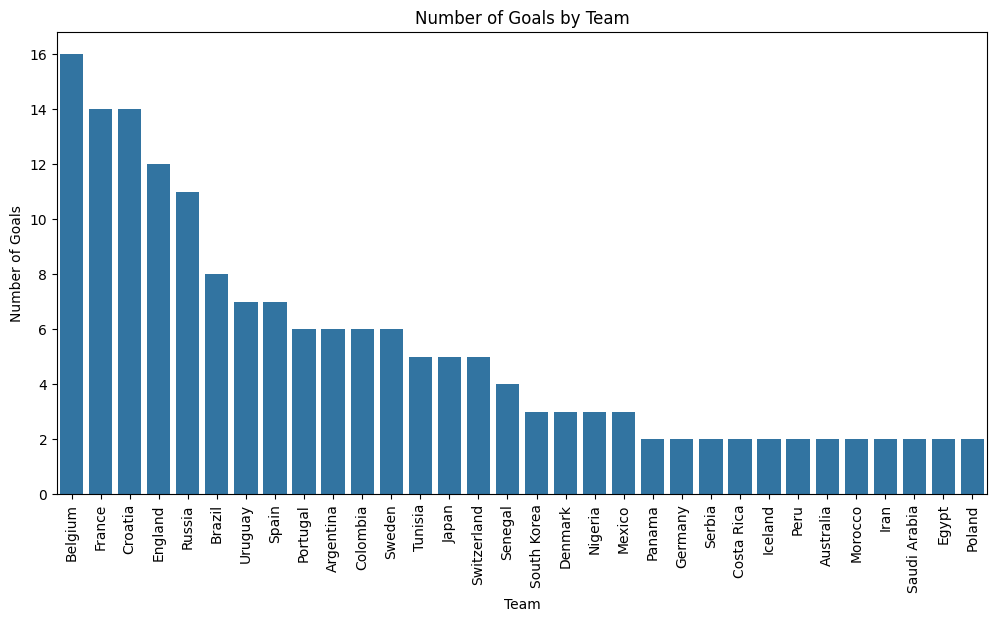

<ipython-input-3-7c79e05efa26>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=goals_by_stage.index, y=goals_by_stage.values, palette='viridis')


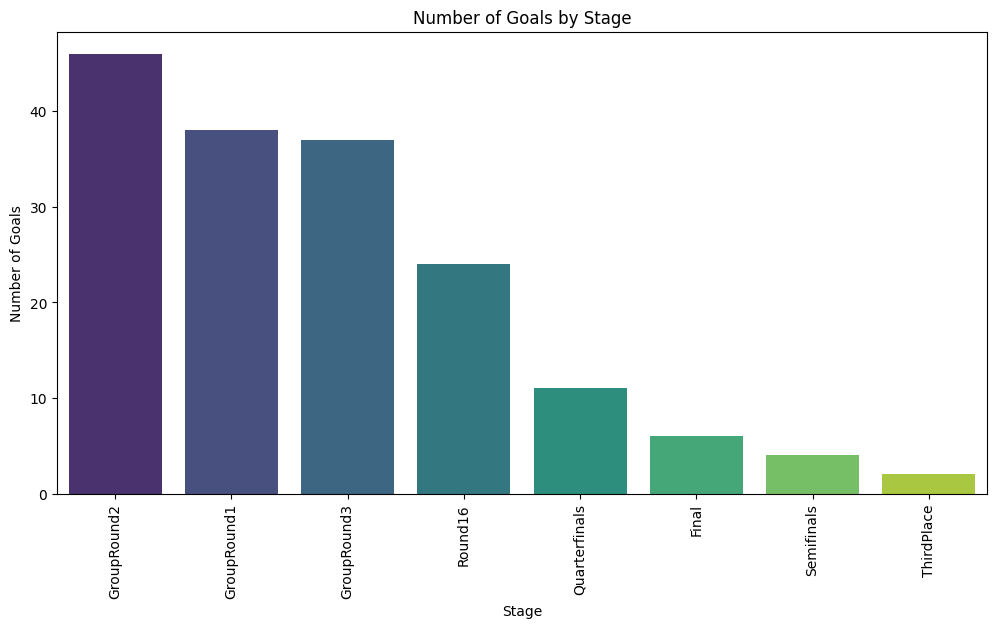

<ipython-input-3-7c79e05efa26>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=goal_types.index, y=goal_types.values, palette='magma')


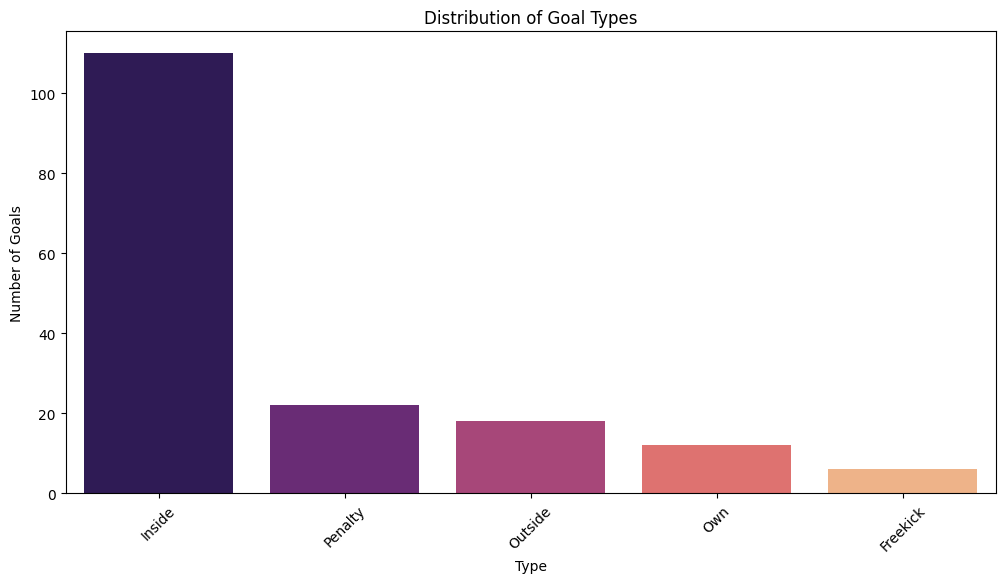

<ipython-input-3-7c79e05efa26>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.index, y=top_scorers.values, palette='coolwarm')


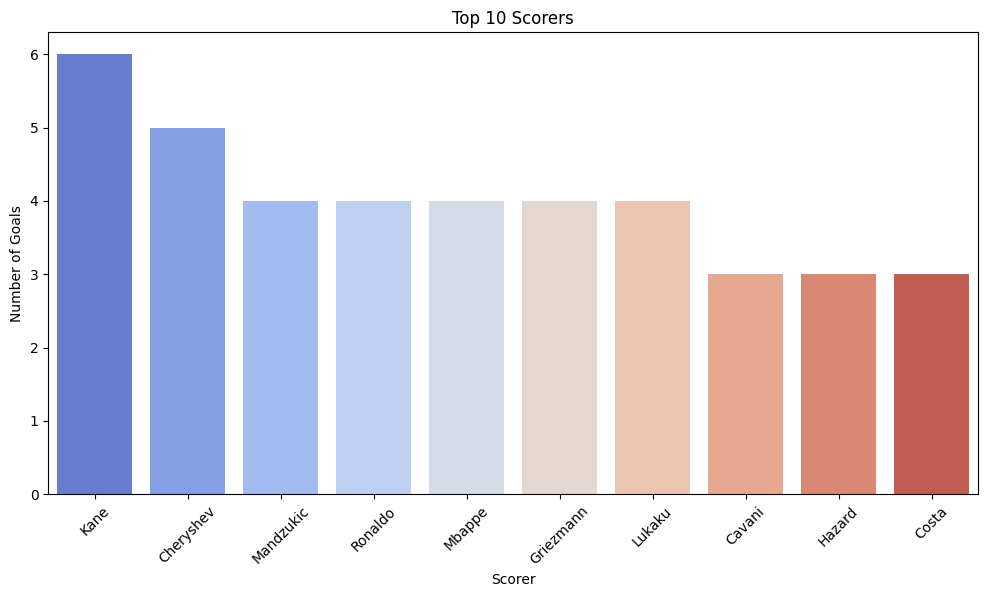

In [ ]:
# Number of goals by team
goals_by_team = data['ScoringTeam'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=goals_by_team.index, y=goals_by_team.values)
plt.title('Number of Goals by Team')
plt.xlabel('Team')
plt.ylabel('Number of Goals')
plt.xticks(rotation=90)
plt.show()

# Goals scored in different stages of the competition
goals_by_stage = data['Stage'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=goals_by_stage.index, y=goals_by_stage.values, palette='viridis')
plt.title('Number of Goals by Stage')
plt.xlabel('Stage')
plt.ylabel('Number of Goals')
plt.xticks(rotation=90)
plt.show()

# Distribution of goal types
goal_types = data['Type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=goal_types.index, y=goal_types.values, palette='magma')
plt.title('Distribution of Goal Types')
plt.xlabel('Type')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.show()

# Top Scorers
top_scorers = data['Scorer'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_scorers.index, y=top_scorers.values, palette='coolwarm')
plt.title('Top 10 Scorers')
plt.xlabel('Scorer')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# User interaction
def choose_team():
    teams = data['Home'].unique().tolist()
    team = input(f"Choose a team from {teams}: ")
    while team not in teams:
        print("Invalid team. Choose from the list.")
        team = input(f"Choose a team from {teams}: ")
    return team

selected_team = choose_team()

# Prediction function
def predict_goal_type(team):
    team_data = data[(data['Home'] == team) | (data['Away'] == team)]
    if team_data.empty:
        return f"No data available for {team}."
    else:
        goal_types = team_data['Type'].value_counts().index.tolist()
        if 'Penalty' in goal_types:
            return f"{team} has scored a Penalty."
        elif 'Freekick' in goal_types:
            return f"{team} has scored a Freekick."
        else:
            return f"{team} has scored other types of goals: {', '.join(goal_types)}."

# Predict based on user selection
prediction = predict_goal_type(selected_team)
print(prediction)

Choose a team from ['Russia', 'Egypt', 'Uruguay', 'Saudi Arabia', 'Morocco', 'Portugal', 'Iran', 'Spain', 'France', 'Peru', 'Denmark', 'Australia', 'Argentina', 'Croatia', 'Nigeria', 'Iceland', 'Costa Rica', 'Brazil', 'Serbia', 'Switzerland', 'Germany', 'Sweden', 'South Korea', 'Mexico', 'Belgium', 'Tunisia', 'England', 'Panama', 'Colombia', 'Poland', 'Japan', 'Senegal']: Sweden
Sweden has scored a Penalty.


In [20]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
from collections import Counter

# Load data
df = pd.read_csv('goals.csv')

# Data preprocessing (example)
# Convert 'Stage' to categorical
df['Stage'] = df['Stage'].astype('category')

# Handle missing values if any
df.fillna(method='ffill', inplace=True)

# Initialize Dash app
app = dash.Dash(__name__)

# Define custom CSS styling
styles = {
    'header': {
        'textAlign': 'center',
        'fontFamily': 'Arial, sans-serif',
        'color': '#333333',
        'paddingTop': '20px',
        'marginBottom': '30px'
    },
    'dropdown': {
        'width': '50%',
        'margin': '0 auto',
        'textAlign': 'center',
        'fontFamily': 'Arial, sans-serif',
        'fontSize': '16px'
    },
    'output': {
        'textAlign': 'center',
        'fontFamily': 'Arial, sans-serif',
        'fontSize': '18px',
        'marginTop': '20px'
    },
    'goalType': {
        'marginTop': '20px',
        'padding': '10px',
        'backgroundColor': '#ffffff',
        'borderRadius': '5px',
        'boxShadow': '0px 0px 5px 0px rgba(0,0,0,0.1)',
        'width': '50%',
        'margin': '0 auto',
        'textAlign': 'center',
        'fontFamily': 'Arial, sans-serif',
        'fontSize': '16px'
    },
    'pieChart': {
        'marginTop': '40px'
    }
}

# Define goal types
goal_types = ['Inside', 'Freekick', 'Own', 'Penalty']

# Define app layout
app.layout = html.Div(style={'backgroundColor': '#f2f2f2'}, children=[
    html.H1("Football Goal Type Predictor", style=styles['header']),
    html.Label("Select a team:", style=styles['dropdown']),
    dcc.Dropdown(
        id='team-dropdown',
        options=[{'label': team, 'value': team} for team in sorted(df['Home'].unique())],
        value='Brazil',  # Default value
        style={'width': '50%', 'margin': '0 auto'}
    ),
    html.Div(id='prediction-output', style=styles['output']),
    html.Div(id='goal-type-output', style=styles['goalType']),
    dcc.Graph(id='pie-chart', style=styles['pieChart'])
])

# Define callback to update prediction based on team selection
@app.callback(
    Output('prediction-output', 'children'),
    Output('pie-chart', 'figure'),
    [Input('team-dropdown', 'value')]
)
def update_prediction(selected_team):
    team_data = df[(df['Home'] == selected_team) | (df['Away'] == selected_team)]
    if team_data.empty:
        return f"No data available for {selected_team}.", go.Figure()
    else:
        goal_types_counts = team_data['Type'].value_counts()
        pie_chart_data = go.Pie(
            labels=goal_types,
            values=[goal_types_counts.get(goal_type, 0) for goal_type in goal_types],
            hole=0.3,
            hoverinfo='label+percent',
            textinfo='value',
            marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        )
        return (
            html.Div([
                html.Div(f"{selected_team} goal type distribution:", style={'fontSize': '18px', 'fontWeight': 'bold'}),
                html.Ul([
                    html.Li(f"{goal_type}: {goal_types_counts.get(goal_type, 0)}")
                    for goal_type in goal_types
                ])
            ]),
            {'data': [pie_chart_data], 'layout': go.Layout(title=f"{selected_team} Goal Type Distribution")}
        )

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [19]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from collections import Counter

# Load data
df = pd.read_csv('goals.csv')

# Data preprocessing (example)
# Convert 'Stage' to categorical
df['Stage'] = df['Stage'].astype('category')

# Handle missing values if any
df.fillna(method='ffill', inplace=True)

# Initialize Dash app
app = dash.Dash(__name__)

# Define custom CSS styling
styles = {
    'header': {
        'textAlign': 'center',
        'fontFamily': 'Arial, sans-serif',
        'color': '#333333',
        'paddingTop': '20px',
        'marginBottom': '30px'
    },
    'dropdown': {
        'width': '50%',
        'margin': '0 auto',
        'textAlign': 'center',
        'fontFamily': 'Arial, sans-serif',
        'fontSize': '16px'
    },
    'output': {
        'textAlign': 'center',
        'fontFamily': 'Arial, sans-serif',
        'fontSize': '18px',
        'marginTop': '20px'
    }
}

# Define app layout
app.layout = html.Div(style={'backgroundColor': '#f2f2f2'}, children=[
    html.H1("Football Goal Type Predictor", style=styles['header']),
    html.Label("Select a team:", style=styles['dropdown']),
    dcc.Dropdown(
        id='team-dropdown',
        options=[{'label': team, 'value': team} for team in sorted(df['Home'].unique())],
        value='Brazil',  # Default value
        style={'width': '50%', 'margin': '0 auto'}
    ),
    html.Div(id='prediction-output', style=styles['output'])
])

# Define callback to update prediction based on team selection
@app.callback(
    Output('prediction-output', 'children'),
    [Input('team-dropdown', 'value')]
)
def update_prediction(selected_team):
    team_data = df[(df['Home'] == selected_team) | (df['Away'] == selected_team)]
    if team_data.empty:
        return f"No data available for {selected_team}."
    else:
        goal_types = team_data['Type'].value_counts().index.tolist()
        if 'Penalty' in goal_types:
            return html.Div(f"{selected_team} has scored a Penalty.", style={'marginTop': '10px'})
        elif 'Freekick' in goal_types:
            return html.Div(f"{selected_team} has scored a Freekick.", style={'marginTop': '10px'})
        else:
            return html.Div(f"{selected_team} has scored other types of goals: {', '.join(goal_types)}.", style={'marginTop': '10px'})

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>